# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [34]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
import matplotlib.pyplot as plt

## Regression Model Evaluation

In [35]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [36]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [37]:
# Data details check
rows, columns = data.shape
print(f"Total rows: {rows}")
print(f"Total columns: {columns}")

column_names = data.columns.tolist()
print(f"Column names: {column_names}")

Total rows: 506
Total columns: 14
Column names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [38]:
# X defined
import numpy as np
X = np.asarray(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
X[0:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [39]:
# Y defined
y = np.asarray(data['MEDV'])
y [0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [7]:
#Pre-procesing for Normalization
#from sklearn import preprocessing
#X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

In [40]:
# Your code here :
#Data Split prior to train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (404, 13) (404,)
Test set: (102, 13) (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [41]:
# Your code here :
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LinearRModel=LinearRegression().fit(X_train,y_train)
LinearRModel

pred_y_test=LinearRModel.predict(X_test)
print(f'Y test predictions:\n{pred_y_test}')
pred_y_train=LinearRModel.predict(X_train)
print(f'Y train predictions:\n{pred_y_train}')


Y test predictions:
[12.07495986 26.9894969  17.58803353 18.15584511 36.92091659 25.43267386
 31.09256932 19.72549907 19.66103377 22.96358632 28.38841214 28.48925986
 18.99690357 32.41097504 21.52350275 15.25945122 21.23364112 11.6220597
 11.37109662 13.63515584  5.62431971 17.35323315 20.80951594 22.51311312
 16.39055556 20.32352451 17.88994185 14.23445109 21.1187098  17.50765806
 14.54295525 23.63289896 34.32419647 22.23027161 16.82396516 20.16274383
 30.67665825 35.61882904 23.50372003 24.66451121 36.91269871 32.33290254
 19.11785719 32.19546605 33.42795148 25.52705821 40.63477427 18.21762788
 19.34587461 23.80167377 33.42122982 26.1451108  18.10363121 28.19906437
 13.37486655 23.34019279 24.44952678 33.54973856 16.71263275 36.56402224
 15.69684554 18.55447039 32.14543203 15.49568061 39.02363234 27.38174402
 31.96333419 10.09436162 19.13214621 21.73038157 23.14682001 22.82615401
 22.51245566 28.21477189 17.13262484 23.08039019 16.65978367 25.17892617
 13.68806399 19.8195139  22.3123

## 3. Calculate and print R-squared for both the training and the testing set.

In [42]:
# Your code here :
train_r2 = r2_score(y_train, pred_y_train)
print(f"Training R²: {train_r2}")

test_r2 = r2_score(y_test, pred_y_test)
print(f"Testing R²: {test_r2}")

Training R²: 0.7415244219726307
Testing R²: 0.7263451459702501


## 4. Calculate and print mean squared error for both the training and the testing set.

In [43]:
# Your code here :
train_mesqer = mean_squared_error(y_train, pred_y_train)
print(f"Training Mean Squared Error: {train_mesqer}")
test_mesqer = mean_squared_error(y_test, pred_y_test)
print(f"Testing Mean Squared Error: {test_mesqer}")


Training Mean Squared Error: 21.197139922226427
Testing Mean Squared Error: 25.419587126821927


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [44]:
# Your code here :
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error
train_meaber = mean_absolute_error(y_train, pred_y_train)
test_meaber = mean_absolute_error(y_test, pred_y_test)

# Print Results
print(f"Training Mean Absolute Error: {train_meaber}")
print(f"Testing Mean Absolute Error: {test_meaber}")

Training Mean Absolute Error: 3.2269621335646788
Testing Mean Absolute Error: 3.3677909837965765


## Classification Model Evaluation

In [45]:
from sklearn.datasets import load_iris
data = load_iris()

In [46]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [47]:
column_names = data.feature_names

In [48]:
df = pd.DataFrame(data['data'],columns=column_names)

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
target = pd.DataFrame(data.target)

In [50]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [52]:
#First allways to define X
X = np.asarray(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [53]:
#Second allways to define Y
y = np.asarray(data.target)
y [0:5]

array([0, 0, 0, 0, 0])

In [54]:
#Pre-procesing for Normalization
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [55]:
# Your code here :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [56]:
# Your code here :
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, solver='liblinear')

In [57]:
#Predictions and print
pred_y_train=LR.predict(X_train)
print(f'Y train predictions:\n{pred_y_train}')
pred_y_test=LR.predict(X_test)
print(f'Y test predictions:\n{pred_y_test}')


Y train predictions:
[2 0 2 0 1 2 2 1 2 0 2 0 2 0 2 0 0 2 2 2 0 1 2 2 2 1 0 1 1 1 0 1 0 2 2 2 2
 2 0 1 2 0 1 2 0 2 2 2 1 0 2 2 2 0 2 1 2 1 2 1 2 2 1 2 2 1 1 0 2 0 2 0 1 1
 1 1 0 2 2 1 1 1 0 0 2 2 0 0 0 2 0 0 2 2 2 0 0 0 2 2 0 0 2 2 2 0 0 2 1 1 1
 2 2 2 2 2 1 2 2 2]
Y test predictions:
[2 0 2 2 2 2 2 0 0 2 0 0 0 2 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [58]:
# Your code here :
from sklearn.metrics import accuracy_score, classification_report
print(f"Logistic Regression Accuracy on Training: {accuracy_score(y_train, pred_y_train)}")
print(f"Logistic Regression Accuracy on Testing: {accuracy_score(y_test, pred_y_test)}")

Logistic Regression Accuracy on Training: 0.825
Logistic Regression Accuracy on Testing: 0.9


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [59]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

# Balanced accuracy
balanced_train = balanced_accuracy_score(y_train, pred_y_train)
balanced_test = balanced_accuracy_score(y_test, pred_y_test)

print(f"Balanced Accuracy on Training: {balanced_train}")
print(f"Balanced Accuracy on Testing: {balanced_test}")

Balanced Accuracy on Training: 0.8429990966576332
Balanced Accuracy on Testing: 0.7999999999999999


## 10. Calculate and print the precision score for both the training and the testing set.

In [60]:
# Your code here :
from sklearn.metrics import precision_score

# Precision score
precision_train = precision_score(y_train, pred_y_train, average='weighted')
precision_test = precision_score(y_test, pred_y_test, average='weighted')

print(f"Precision on Training: {precision_train}")
print(f"Precision on Testing: {precision_test}")


Precision on Training: 0.8612889983579638
Precision on Testing: 0.925


## 11. Calculate and print the recall score for both the training and the testing set.

In [61]:
# Your code here :
from sklearn.metrics import recall_score

# Recall score
recall_train = recall_score(y_train, pred_y_train, average='weighted')
recall_test = recall_score(y_test, pred_y_test, average='weighted')

print(f"Recall on Training: {recall_train}")
print(f"Recall on Testing: {recall_test}")

Recall on Training: 0.825
Recall on Testing: 0.9


## 12. Calculate and print the F1 score for both the training and the testing set.

In [62]:
# Your code here :
from sklearn.metrics import f1_score

# F1 Score for training and testing sets
f1_train = f1_score(y_train, pred_y_train, average='weighted')
f1_test = f1_score(y_test, pred_y_test, average='weighted')

print(f"F1 Score on Training: {f1_train}")
print(f"F1 Score on Testing: {f1_test}")

F1 Score on Training: 0.8196485401964855
F1 Score on Testing: 0.8857142857142857


## 13. Generate confusion matrices for both the training and the testing set.

In [63]:
# Your code here :
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred_y_test, labels=[1,0]))

[[ 2  0]
 [ 0 16]]


Confusion matrix, without normalization
[[ 2  0]
 [ 0 16]]


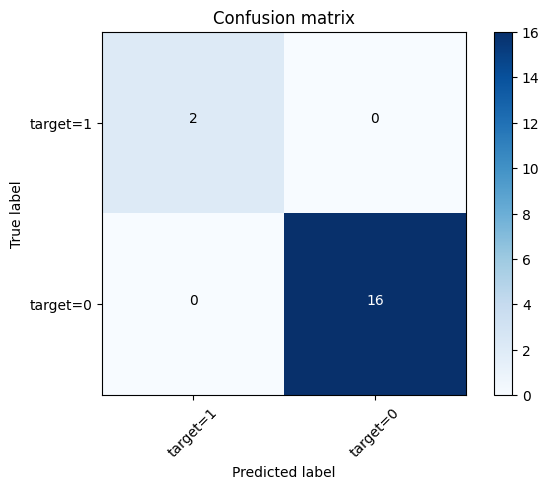

In [64]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_y_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')

In [65]:
# Confusion matrix for Training :
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_train, pred_y_train, labels=[1,0]))

[[26  0]
 [ 0 34]]


Confusion matrix, without normalization
[[26  0]
 [ 0 34]]


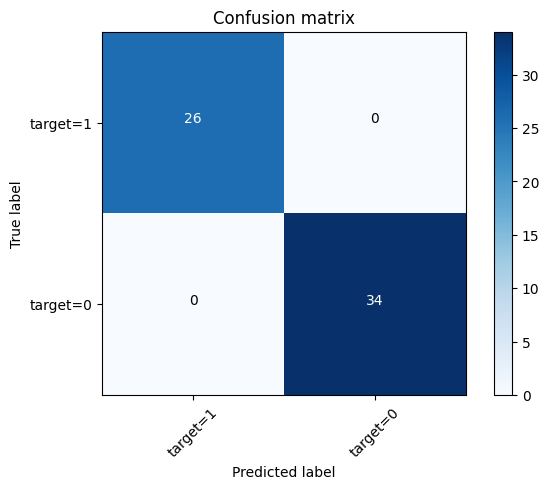

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, pred_y_train, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [67]:
# K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred_test = knn.predict(X_test)
knn_f1 = f1_score(y_test, knn_pred_test, average='weighted')
print(f"KNN F1 Score on Testing: {knn_f1}")

KNN F1 Score on Testing: 0.9040078201368524


In [68]:
#Support Vector Machines (SVM):
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_pred_test = svc.predict(X_test)
svc_f1 = f1_score(y_test, svc_pred_test, average='weighted')
print(f"SVM F1 Score on Testing: {svc_f1}")

SVM F1 Score on Testing: 0.8970760233918128


In [69]:
#Random Forest:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred_test = rf.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred_test, average='weighted')
print(f"Random Forest F1 Score on Testing: {rf_f1}")

Random Forest F1 Score on Testing: 0.9656920077972709
